In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Dict, Tuple

In [12]:
%matplotlib inline
plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
mpl.rcParams['figure.dpi'] = 150
label_size = 22
tick_size = 20
title_size = 24
legend_size = 16

In [13]:
def extract_parameters(path: str) -> Dict[str, str]:
    param_components = path.split("?")[1][:-4].split("_")
    parameters = {}
    for component in param_components:
        name, value = tuple(component.split("="))
        parameters[name] = value
    return parameters

In [14]:
def load_simulated_data(path: str) -> Tuple[pd.DataFrame, Dict[str, str]]:
    df = pd.read_csv(path)
    parameters = extract_parameters(path)
    return df, parameters

In [15]:
def param_string(parameters: Dict[str, str]) -> str:
    ret = ""
    for key, value in parameters.items():
        ret += "$" + key + "$"
        ret += "="
        ret += str(value)
        ret += ", "
    ret = ret[:-2]
    return ret

In [16]:
def plot(path: str, y="VI"):
    df, parameters = load_simulated_data(path)
    cols = df.columns
    ax = sns.lineplot(data=df, x=cols[0], y=y, hue=cols[2], markers=True, style=cols[2], err_style='bars')
    tlt = param_string(parameters)

    if cols[0] == 'p':
        ax.set_xlabel("edge probability $(" + cols[0] + ")$", fontsize=label_size)
    if cols[0] == 'K':
        ax.set_xlabel("no. clusters $(" + cols[0] + ")$", fontsize=label_size)
    old_y = y
    if y == 'VI':
        y = '$\mathrm{VI}$'
    if y == 'edge_error_rate':
        y = 'edge error rate'

    ax.set_ylabel(y, fontsize=label_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    # ax.set_title("CBM, " + ("Varying $p$, " if "edge" in path else "Varying "
    #                                                              "$K$, ") + tlt)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    for i in range(len(labels)):
        labels[i] = labels[i].replace('I_', 'm=')
        labels[i] = '$' + labels[i] + '$'
    plt.legend(handles, labels, fontsize=legend_size)
    plt.tight_layout()
    plt.savefig(f'simulation_{old_y}_{cols[0]}_{tlt[4:7]}')
    plt.show()

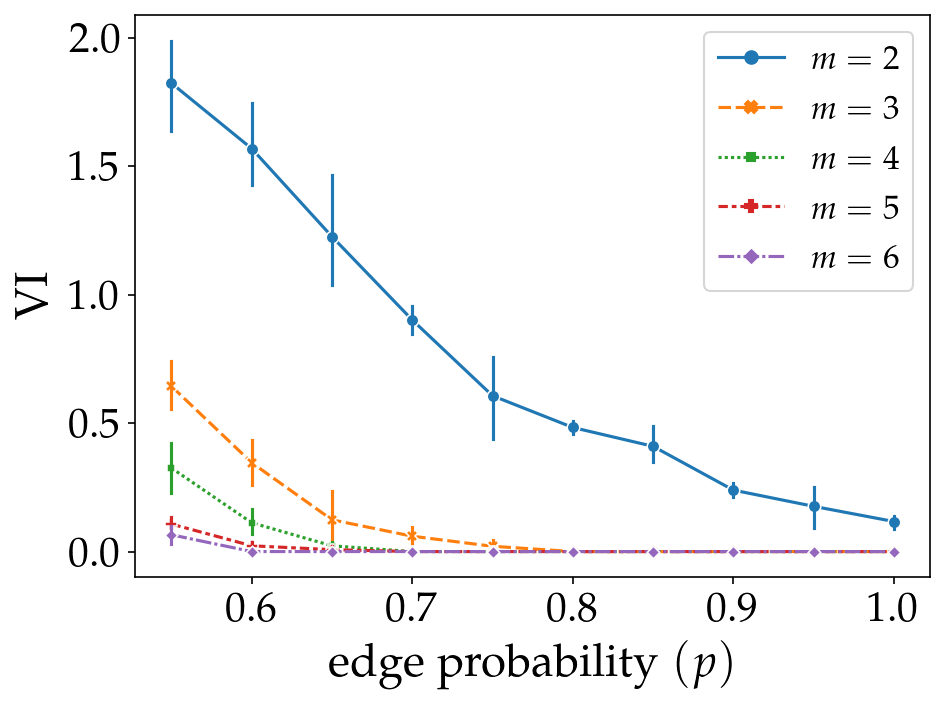

In [17]:
plot('data/edge_density?n=300_K=3_r=0.15_q=0.25_mode=bycost.tsv')

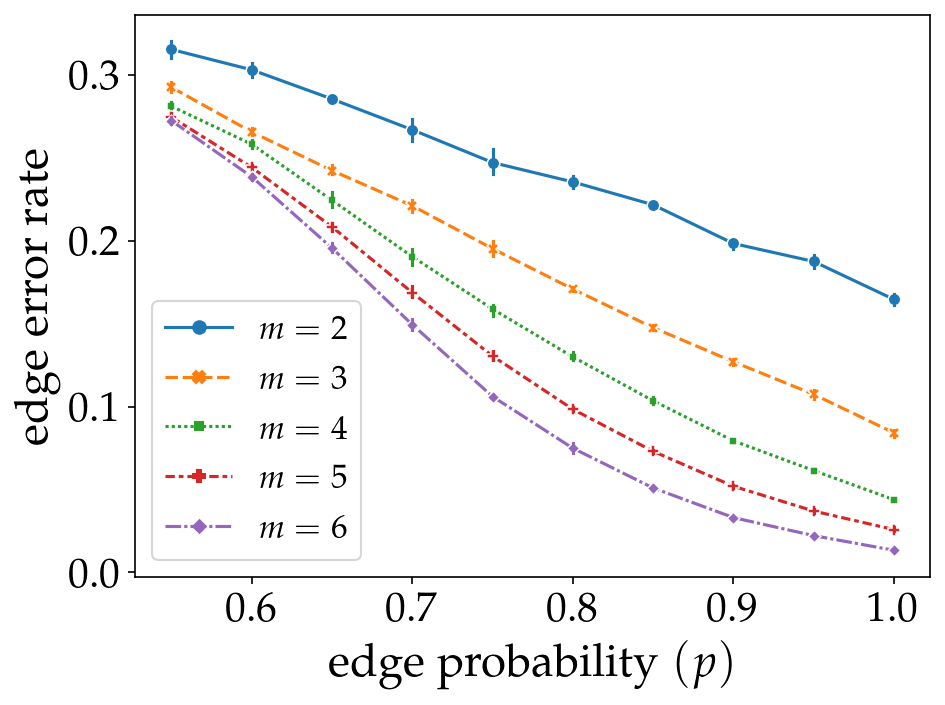

In [18]:
plot("data/edge_density?n=300_K=3_r=0.15_q=0.25_mode=bycost.tsv", y="edge_error_rate")

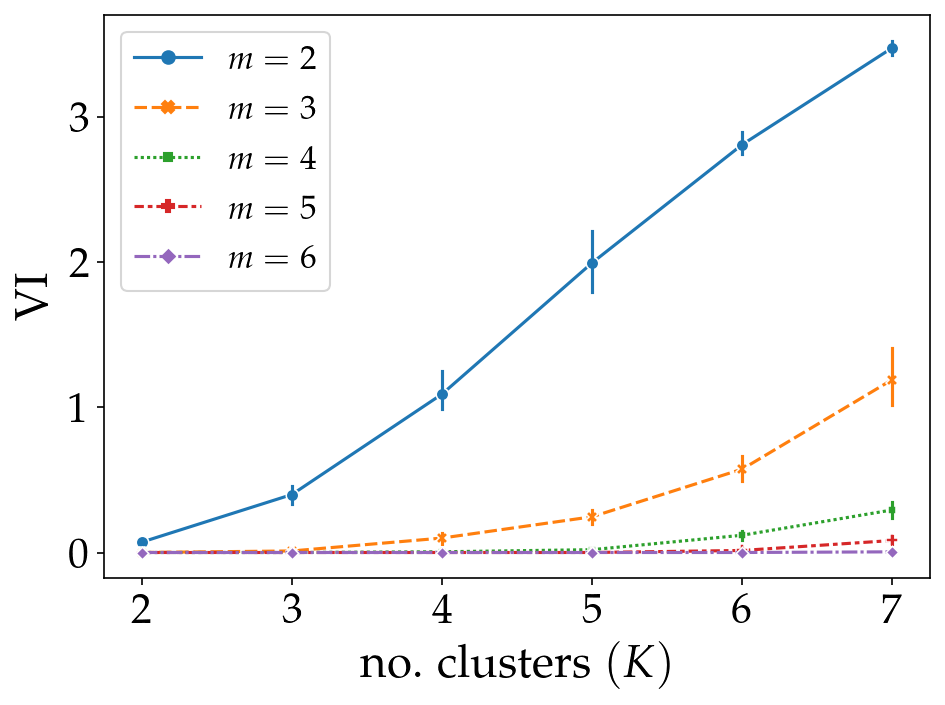

In [19]:
plot("data/number_of_clusters?N=450_p=0.7_r=0.15_q=0.25_mode=bycost.tsv")

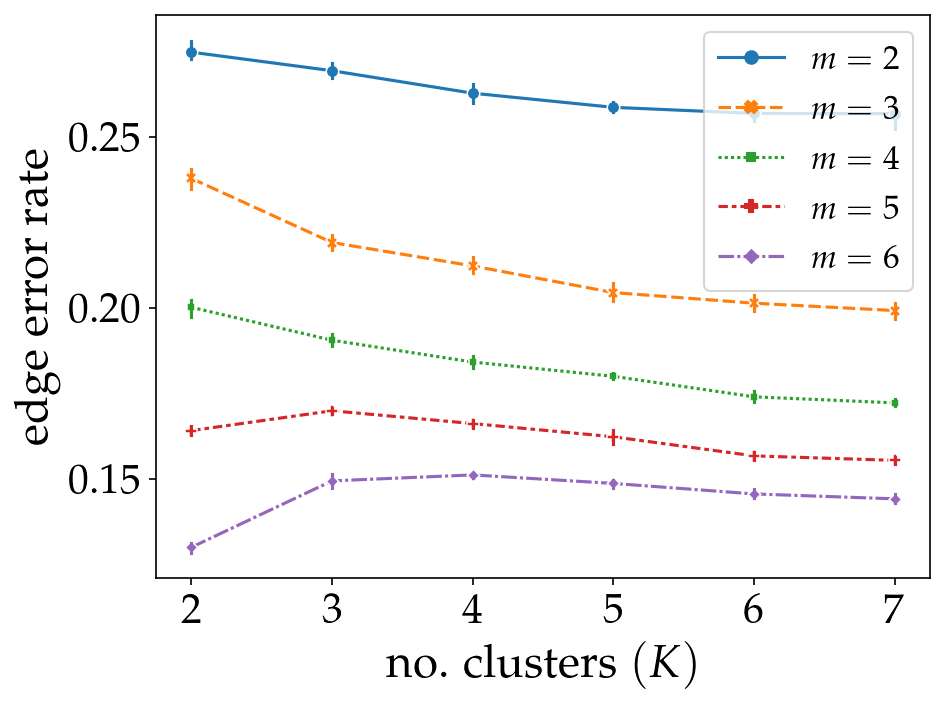

In [20]:
plot("data/number_of_clusters?N=450_p=0.7_r=0.15_q=0.25_mode=bycost.tsv",
     y="edge_error_rate")